# House building from HBR
>Adapted from https://laurentlessard.com/teaching/cs524/slides/1%20-%20introduction.pdf

Several tasks must be completed in order to build our house. Each task has a duration, tasks may be worked on simultaneously, but there is also a precedence relation. Some tasks can only be started once other tasks have been completed. The following table shows each task, it's duration, and the tasks that must be completed before it starts. How fast can the house be built?

 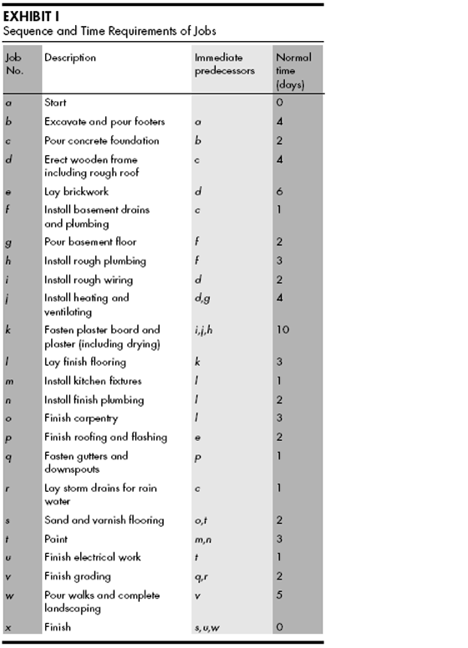

Create a list of tasks (a - x) and a list of their durations. Then create a dictionary with tasks as keys and duration as values.

In [1]:
# tasks list
tasks  = [chr(x) for x in range(ord('a'), ord('x') + 1)]

# task duration list
dur = [0, 4, 2, 4, 6, 1, 2, 3, 2, 4, 10, 3, 1, 2, 3, 2, 1, 1, 2, 3, 1, 2, 5, 0]

taskDuration = dict(zip(tasks, dur)) #zip(keys, values)
print(taskDuration)


{'a': 0, 'b': 4, 'c': 2, 'd': 4, 'e': 6, 'f': 1, 'g': 2, 'h': 3, 'i': 2, 'j': 4, 'k': 10, 'l': 3, 'm': 1, 'n': 2, 'o': 3, 'p': 2, 'q': 1, 'r': 1, 's': 2, 't': 3, 'u': 1, 'v': 2, 'w': 5, 'x': 0}


Create tuples for each "edge of the graph", these represent the pairs of tasks where the first is the task that comes before the current task.

In [2]:
# (Pre-Task, Task)
Edges = (("a", "b"), ("b","c"),("c","d"), ("d","e"), ("c","f"), ("f","g"), ("f","h"), ("d","i"), ("d","j"), ("g","j"), ("i","k"), ("j","k"), ("h","k"), ("k","l"), ("l","m"), ("l","n"), ("l","o"), ("e","p"), ("p","q"), ("c","r"), ("o","s"), ("t","s"), ("m","t"), ("n","t"), ("t","u"), ("q","v"), ("r","v"), ("v","w"), ("s","x"), ("u","x"),("w","x"))


Start using PuLP to solve our LP

In [3]:
from pulp import *

In [4]:
#Create the prob variable to contain the problem data
prob = LpProblem("House Building", LpMinimize)

In [5]:
#Create the decision variables Tstart is that is an integer
Tstart = LpVariable.dicts("Tstart",tasks,0,None,LpInteger)

Our objective is to minimize total duration of the house building. The total duration is equal to the start time of the last task (Task "X") and the duration of the last task (Task "X" has duration 0).

In [6]:
#Our objective is to minimize total duration
prob += Tstart["x"] + taskDuration["x"], "Objective"

For every edge we have a relationship that Tstart(prev) + Duration(prev) <= Tstart(current).

In [7]:
#Add constraints
for edge in Edges:
    task_cur = edge[1]
    task_pre = edge[0]
    prob += Tstart[task_pre] + taskDuration[task_pre] <= Tstart[task_cur], ""

In [8]:
prob.solve()

1

In [9]:
prob.writeLP("HouseBuilding.lp")

In [10]:
#Print the variables
for v in prob.variables():
    print(v.name, "=", v.varValue)

Tstart_a = 0.0
Tstart_b = 0.0
Tstart_c = 4.0
Tstart_d = 6.0
Tstart_e = 10.0
Tstart_f = 6.0
Tstart_g = 7.0
Tstart_h = 7.0
Tstart_i = 10.0
Tstart_j = 10.0
Tstart_k = 14.0
Tstart_l = 24.0
Tstart_m = 27.0
Tstart_n = 27.0
Tstart_o = 27.0
Tstart_p = 16.0
Tstart_q = 18.0
Tstart_r = 6.0
Tstart_s = 32.0
Tstart_t = 29.0
Tstart_u = 32.0
Tstart_v = 19.0
Tstart_w = 21.0
Tstart_x = 34.0
